We will first import the relevant libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

Importing and exploring data

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [4]:
df.info()
#The dataset has 1000 entries with no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [75]:
#the data type for 'Date' column is in ojbect form. We will divide this to year and month for the possibility of monthly trend analysis 
df.Date=pd.to_datetime(df.Date)
df.insert(10,'year',df.Date.dt.year)
df.insert(11,'month',df.Date.dt.month)

In [76]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,year,month,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019,1,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019,3,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019,3,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019,1,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019,2,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [77]:
#We will drop the original date and time column as it will not be relevant anymore in this analysis
df.drop(columns=['Date','Time'], axis=1,inplace=True)

In [78]:
df.head()
#Previous Data and Time columns has been dropped

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,year,month,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019,1,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019,3,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019,3,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019,1,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019,2,Ewallet,604.17,4.761905,30.2085,5.3


In [79]:
df.isnull().sum()
#We can clearly see that there is no missing values in the dataset

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
year                       0
month                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [80]:
df.describe()
#We can see basic statistics for the dataset

,Unit price,Quantity,Tax 5%,Total,year,month,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019.0,1.993000,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,0.0,0.835254,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,2019.0,1.000000,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019.0,1.000000,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019.0,2.000000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019.0,3.000000,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019.0,3.000000,993.00000,4.761905e+00,49.650000,10.00000


In [81]:
df.describe(include='O')
#We can now see the unique numbers in the object type data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,Ewallet
freq,1,340,340,501,501,178,345


In [82]:
df.corr()
#We can see the correlation of each integer and float datatype columns 

,Unit price,Quantity,Tax 5%,Total,year,month,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,NaN,-0.027387,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,NaN,-0.014524,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,NaN,-0.022301,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,NaN,-0.022301,1.000000,NaN,1.000000,-0.036442
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.027387,-0.014524,-0.022301,-0.022301,NaN,1.000000,-0.022301,NaN,-0.022301,-0.042880
cogs,0.633962,0.705510,1.000000,1.000000,NaN,-0.022301,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,NaN,-0.022301,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,NaN,-0.042880,-0.036442,NaN,-0.036442,1.000000


In [83]:
df.shape
#contains 1,000 rows and 17 columns

(1000, 17)

In [84]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'year',
       'month', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [85]:
df['Invoice ID'].nunique()

1000

In [86]:
df.drop('Invoice ID', axis=1, inplace=True)
#drop the 'invoice ID' as it is not needed in this analysis as it gives no analysis purpose.

Basic analysis of the Product line

In [87]:
df['Product line'].value_counts()
#We can see the Fashion accessories has the biggest sales and Health and beauty product line with the lowest. However, the gap isn't big

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [88]:
df['Gender'].value_counts()
#There is not a big difference in sales by gender

Female    501
Male      499
Name: Gender, dtype: int64

In [89]:
df['Branch'].value_counts()
#Each branch also made similar sales performance

A    340
B    332
C    328
Name: Branch, dtype: int64

In [90]:
df['City'].value_counts()
#Each city has similar sales

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [91]:
productline_gender = df.groupby('Gender')['Product line'].value_counts()
print(productline_gender)
#Female's purchased Fashion accessories the most and Male's purcahsed Health and beauty products more

Gender  Product line          
Female  Fashion accessories       96
        Food and beverages        90
        Sports and travel         88
        Electronic accessories    84
        Home and lifestyle        79
        Health and beauty         64
Male    Health and beauty         88
        Electronic accessories    86
        Food and beverages        84
        Fashion accessories       82
        Home and lifestyle        81
        Sports and travel         78
Name: Product line, dtype: int64


In [92]:
product_price = df.groupby('Product line')['Unit price'].sum()
print(product_price)
#Fashion accessories has the most expensive product line

Product line
Electronic accessories     9103.77
Fashion accessories       10173.35
Food and beverages         9745.54
Health and beauty          8337.88
Home and lifestyle         8850.71
Sports and travel          9460.88
Name: Unit price, dtype: float64


In [44]:
product_rate = df.groupby('Product line')['Rating'].mean()
print(product_rate)
#Food and beverages has the highest rating and Home and lifestyle product line the lowest

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


In [45]:
product_quant = df.groupby('Product line')['Quantity'].sum()
print(product_quant)
#Electronic accesories made the most sales and Home and beauty products the lowest

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64


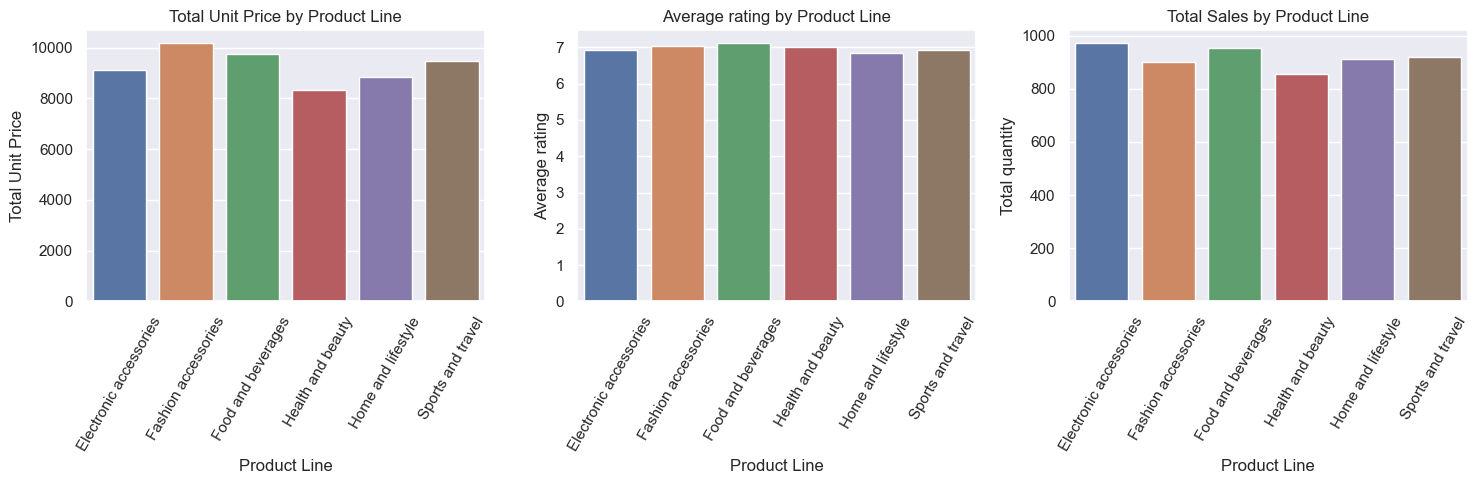

In [108]:
#We will visualize the three findings regarding Product lines
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x=product_price.index, y=product_price.values, ax=axes[0])
axes[0].set_xlabel('Product Line')
axes[0].set_ylabel('Total Unit Price')
axes[0].set_title('Total Unit Price by Product Line')
axes[0].set_xticklabels(product_price.index, rotation=60)

sns.barplot(x=product_rate.index, y=product_rate.values, ax=axes[1])
axes[1].set_xlabel('Product Line')
axes[1].set_ylabel('Average rating')
axes[1].set_title('Average rating by Product Line')
axes[1].set_xticklabels(product_rate.index, rotation=60)

sns.barplot(x=product_quant.index, y=product_quant.values, ax=axes[2])
axes[2].set_xlabel('Product Line')
axes[2].set_ylabel('Total quantity')
axes[2].set_title('Total Sales by Product Line')
axes[2].set_xticklabels(product_quant.index, rotation=60)

plt.tight_layout()
plt.show()